# Assignment Set 2
by Zahraoruji for Deep Learing Course at Data Science Center, SBU

In [24]:
import torch
import torchvision
import numpy
import os
import torch.utils.data as datautils
import matplotlib.pyplot as plt
import torch.nn as to_nn
import torch.nn.functional as to_f
import torch.optim as optim
from torch.autograd import Variable
from torchsummary import summary
import torchvision.transforms as transforms

In [14]:
!pip install torchsummary


You should consider upgrading via the 'c:\users\negar\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


# Data Augmentation without Regularization

In [35]:
first_train_transform = transforms.Compose(
                [transforms.RandomHorizontalFlip(),
                 transforms.RandomCrop(size=[32,32], padding=4),
                 transforms.ToTensor()])

# load training and test set
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
cifar10_training_set = torchvision.datasets.CIFAR10(root='./dataset_CIFAR10', train=True, transform=image_transforms,
                                                    download=True)
cifar10_test_set = torchvision.datasets.CIFAR10(root='./dataset_CIFAR10', train=False, transform=image_transforms,
                                                    download=True)
trainingset_loader = datautils.DataLoader(dataset=cifar10_training_set, batch_size=4, shuffle=True, num_workers=2)
testset_loader = datautils.DataLoader(dataset=cifar10_test_set, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [36]:
def matplotlib_imshow(img_tensor, title=None):
    """
    Get and image in tensor form and display it.
    :param img_tensor:
    :return:
    """
    device = torch.device("cpu")
    img_tensor_cpu = img_tensor.to(device)
 
    std = 0.5
    mean = 0.5
 
    img_tensor = std * img_tensor_cpu + mean
    # convert tensor to numpy
    img = img_tensor.numpy()
    # in pytorch image is (3, H, W)
    # normal form is (H, W, 3)
    img = img.transpose(1, 2, 0)
    plt.figure()
    plt.imshow(img)
    if title is not None:
        plt.title(title)

In [37]:
class ConvNet(to_nn.Module):
 
    # constructor of model
    def __init__(self):
        # constructor of parent class
        super(ConvNet, self).__init__()
        # learnable parameter of model (convolution and fully connected layers)
        self.conv1 = to_nn.Conv2d(in_channels=3, out_channels=9, kernel_size=(5, 5))
        self.conv2 = to_nn.Conv2d(in_channels=9, out_channels=18, kernel_size=(3, 3))
        self.fc1 = to_nn.Linear(in_features=18 * 6 * 6, out_features=100)
        self.fc2 = to_nn.Linear(in_features=100, out_features=40)
        self.fc3 = to_nn.Linear(in_features=40, out_features=10)
 
    # feedforward
    def forward(self, input):
        # convolutional layer 1
        out = self.conv1(input)
        # pooling kernel size(2,2) and relu non linearity
        out = to_f.max_pool2d(to_f.relu(out), (2, 2))
        # convolutional layer 2
        out = self.conv2(out)
        # pooling kernel size(2,2) and relu non linearity
        out = to_f.max_pool2d(to_f.relu(out), (2, 2))
        # flatten
        out = out.view(-1, 18 * 6 * 6)
        # fully connected 1 with relu non linearity
        out = to_f.relu(self.fc1(out))
        # fully connected 2 with relu non linearity
        out = to_f.relu(self.fc2(out))
        # fully connected 3
        out = self.fc3(out)
        return out

In [38]:
net = ConvNet()

In [39]:
criterion = to_nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [40]:
LAMBDA = 0.009

for epoch in range(10):
 
    # loss of epoch
    running_loss = 0.0
 
    # iterate over all batches
    for i, data in enumerate(trainingset_loader, 0):
 
        images, labels = data
 
        # makes all gradients zero
        optimizer.zero_grad()
 
        # feedforward
        images = images
        output = net(images)
 
        # loss
        labels = labels
        loss = criterion(output, labels)
    
        
        # backpropagation
        loss.backward()
 
        # update parameters
        optimizer.step()
 
        running_loss += loss.item()
 
        if i % 1000 == 999:
            print('epoch {}, mini-batch {}, loss {}'.format(epoch, i + 1, running_loss/1000.0))
            running_loss = 0.0
 
print('Training Phase is done.')

epoch 0, mini-batch 1000, loss 2.2965765273571015
epoch 0, mini-batch 2000, loss 2.099556497216225
epoch 0, mini-batch 3000, loss 1.9103784903287888
epoch 0, mini-batch 4000, loss 1.7702206750512124
epoch 0, mini-batch 5000, loss 1.657741453796625
epoch 0, mini-batch 6000, loss 1.600678132712841
epoch 0, mini-batch 7000, loss 1.5209916532337666
epoch 0, mini-batch 8000, loss 1.4944425976276399
epoch 0, mini-batch 9000, loss 1.4966239856332542
epoch 0, mini-batch 10000, loss 1.4225530307292937
epoch 0, mini-batch 11000, loss 1.4091745836436749
epoch 0, mini-batch 12000, loss 1.3775607386231423
epoch 1, mini-batch 1000, loss 1.3184301749020815
epoch 1, mini-batch 2000, loss 1.3206395483613014
epoch 1, mini-batch 3000, loss 1.2828480324298144
epoch 1, mini-batch 4000, loss 1.287690644800663
epoch 1, mini-batch 5000, loss 1.2442980882376433
epoch 1, mini-batch 6000, loss 1.2263415278419851
epoch 1, mini-batch 7000, loss 1.2379217710196972
epoch 1, mini-batch 8000, loss 1.2262393057867884
e

Accuracy on test set is: 66.09%
Accuracy of plane: 65.2%
Accuracy of car: 78.7%
Accuracy of bird: 61.5%
Accuracy of cat: 46.9%
Accuracy of deer: 68.1%
Accuracy of dog: 55.2%
Accuracy of frog: 66.5%
Accuracy of horse: 69.5%
Accuracy of ship: 78.5%
Accuracy of truck: 70.8%


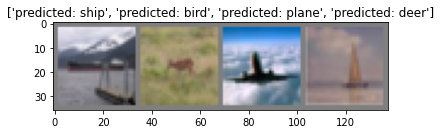

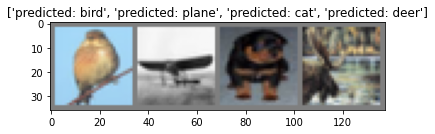

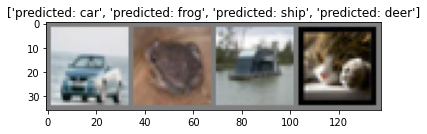

In [41]:
# show qualitative result of training
data_iter = iter(testset_loader)
for i in range(3):
    images, labels_ground_truth = data_iter.next()
    images = images
    labels_ground_truth = labels_ground_truth
    outputs = net(images)
    _, predicted = torch.max(outputs, dim=1)
    matplotlib_imshow(img_tensor=torchvision.utils.make_grid(images), title=['predicted: '+classes[i.item()] for i in predicted])

correct = 0
total = 0
with torch.no_grad():
    for data in testset_loader:
        images, ground_truth_labels = data
        images = images
        ground_truth_labels = ground_truth_labels
        outputs = net(images)
        _, predicted = torch.max(outputs, dim=1)
        total += ground_truth_labels.size(0)
        correct += (ground_truth_labels==predicted).sum().item()
print('Accuracy on test set is: {}%'.format(correct/total * 100))
 
# accuracy of each class in test set
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testset_loader:
        images, labels = data
        images = images
        labels = labels
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of {}: {}%'.format(classes[i], 100 * class_correct[i] / class_total[i]))
plt.show()

# Augmentation with L2 Regularization

In [42]:
LAMBDA = 0.009

for epoch in range(10):
 
    # loss of epoch
    running_loss = 0.0
 
    # iterate over all batches
    for i, data in enumerate(trainingset_loader, 0):
 
        images, labels = data
 
        # makes all gradients zero
        optimizer.zero_grad()
 
        # feedforward
        images = images
        output = net(images)
 
        # loss
        labels = labels
        loss = criterion(output, labels)
        
        #L1 regularization
        
        l2_regularization = torch.tensor(0).long()
        for param in net.parameters():
            l2_regularization += torch.norm(param, 1).long()
            
        loss += LAMBDA * l2_regularization
        
        
 
        # backpropagation
        loss.backward()
 
        # update parameters
        optimizer.step()
 
        running_loss += loss.item()
 
        if i % 1000 == 999:
            print('epoch {}, mini-batch {}, loss {}'.format(epoch, i + 1, running_loss/1000.0))
            running_loss = 0.0
 
print('Training Phase is done.')

epoch 0, mini-batch 1000, loss 50.0502829322815
epoch 0, mini-batch 2000, loss 50.32882347869873
epoch 0, mini-batch 3000, loss 50.60645602798462
epoch 0, mini-batch 4000, loss 50.83255902481079
epoch 0, mini-batch 5000, loss 51.0711215057373
epoch 0, mini-batch 6000, loss 51.247210472106936
epoch 0, mini-batch 7000, loss 51.516506038665774
epoch 0, mini-batch 8000, loss 51.72981198120117
epoch 0, mini-batch 9000, loss 51.937417747497555
epoch 0, mini-batch 10000, loss 52.15121949005127
epoch 0, mini-batch 11000, loss 52.35608354949951
epoch 0, mini-batch 12000, loss 52.55092039871216
epoch 1, mini-batch 1000, loss 52.779504062652585
epoch 1, mini-batch 2000, loss 53.03905265045166
epoch 1, mini-batch 3000, loss 53.31524200820923
epoch 1, mini-batch 4000, loss 53.56227290725708
epoch 1, mini-batch 5000, loss 53.84968101119995
epoch 1, mini-batch 6000, loss 54.03776226806641
epoch 1, mini-batch 7000, loss 54.31322337341309
epoch 1, mini-batch 8000, loss 54.46873623657227
epoch 1, mini-b

Accuracy on test set is: 63.32%
Accuracy of plane: 64.4%
Accuracy of car: 78.0%
Accuracy of bird: 41.5%
Accuracy of cat: 67.1%
Accuracy of deer: 53.4%
Accuracy of dog: 39.5%
Accuracy of frog: 71.2%
Accuracy of horse: 65.8%
Accuracy of ship: 78.5%
Accuracy of truck: 73.8%


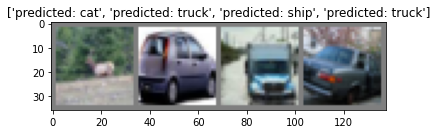

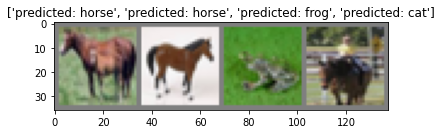

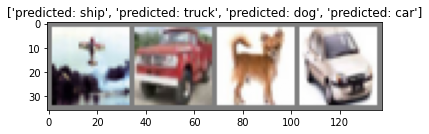

In [43]:
# show qualitative result of training
data_iter = iter(testset_loader)
for i in range(3):
    images, labels_ground_truth = data_iter.next()
    images = images
    labels_ground_truth = labels_ground_truth
    outputs = net(images)
    _, predicted = torch.max(outputs, dim=1)
    matplotlib_imshow(img_tensor=torchvision.utils.make_grid(images), title=['predicted: '+classes[i.item()] for i in predicted])

correct = 0
total = 0
with torch.no_grad():
    for data in testset_loader:
        images, ground_truth_labels = data
        images = images
        ground_truth_labels = ground_truth_labels
        outputs = net(images)
        _, predicted = torch.max(outputs, dim=1)
        total += ground_truth_labels.size(0)
        correct += (ground_truth_labels==predicted).sum().item()
print('Accuracy on test set is: {}%'.format(correct/total * 100))
 
# accuracy of each class in test set
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testset_loader:
        images, labels = data
        images = images
        labels = labels
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of {}: {}%'.format(classes[i], 100 * class_correct[i] / class_total[i]))
plt.show()